In [126]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [127]:

data = pd.read_csv("/Users/zahiramohammed/Desktop/marketing_data.csv")

In [128]:
data.head(5)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Previous,PreviousOutcome,Y
0,45,blue-collar,married,primary,no,0,no,yes,unknown,20,jun,74,2,0,unknown,no
1,43,management,divorced,tertiary,no,1052,no,no,unknown,12,jun,118,3,0,unknown,no
2,46,blue-collar,married,primary,no,7934,yes,no,unknown,19,may,123,1,0,unknown,no
3,38,management,married,tertiary,no,1,no,no,cellular,10,sep,342,2,0,unknown,no
4,39,services,married,secondary,no,636,yes,no,telephone,12,may,15,1,0,unknown,no


In [129]:
# Initialize LabelEncoder
encoder = LabelEncoder()

In [130]:
# Encode categorical columns
categorical_columns = ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'PreviousOutcome', 'Y']
for i in categorical_columns:
    data[i + '_encoded'] = encoder.fit_transform(data[i])

In [131]:
# Drop the original categorical columns
data.drop(columns=categorical_columns, inplace=True)

In [132]:
# Save the encoded DataFrame to a new CSV file
data.to_csv('encoded_file.csv', index=False)

# Display the encoded DataFrame
print(data.head())

   Age  Balance  Day  Duration  Campaign  Previous  Job_encoded  \
0   45        0   20        74         2         0            1   
1   43     1052   12       118         3         0            4   
2   46     7934   19       123         1         0            1   
3   38        1   10       342         2         0            4   
4   39      636   12        15         1         0            7   

   Marital_encoded  Education_encoded  Default_encoded  Housing_encoded  \
0                1                  0                0                0   
1                0                  2                0                0   
2                1                  0                0                1   
3                1                  2                0                0   
4                1                  1                0                1   

   Loan_encoded  Contact_encoded  Month_encoded  PreviousOutcome_encoded  \
0             1                2              6                       

In [133]:
data.head(10)

,Age,Balance,Day,Duration,Campaign,Previous,Job_encoded,Marital_encoded,Education_encoded,Default_encoded,Housing_encoded,Loan_encoded,Contact_encoded,Month_encoded,PreviousOutcome_encoded,Y_encoded
0,45,0,20,74,2,0,1,1,0,0,0,1,2,6,3,0
1,43,1052,12,118,3,0,4,0,2,0,0,0,2,6,3,0
2,46,7934,19,123,1,0,1,1,0,0,1,0,2,8,3,0
3,38,1,10,342,2,0,4,1,2,0,0,0,0,11,3,0
4,39,636,12,15,1,0,7,1,1,0,1,0,1,8,3,0
5,20,829,27,196,3,2,8,2,3,0,0,0,0,4,2,1
6,32,-540,30,53,7,0,0,1,1,0,1,1,2,8,3,0
7,46,1352,6,193,1,0,1,1,1,0,1,0,0,3,3,0
8,39,8654,14,181,4,0,7,0,0,0,1,0,0,8,3,0
9,53,341,12,90,2,2,7,1,1,0,0,0,0,1,2,0


In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
X = data[['Age', 'Balance','Duration']] 

In [136]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

array([[ 4.85399957e-01, -5.79401604e-01, -8.12165182e-01],
       [ 2.91395178e-01,  7.73095071e-03, -6.27123405e-01],
       [ 5.82402347e-01,  3.84864943e+00, -6.06095930e-01],
       [-1.93616769e-01, -5.78843493e-01,  3.14907461e-01],
       [-9.66143800e-02, -2.24443139e-01, -1.06028938e+00],
       [-1.93965978e+00, -1.16727756e-01, -2.99094800e-01],
       [-7.75631107e-01, -8.80781432e-01, -9.00480576e-01],
       [ 5.82402347e-01,  1.75164189e-01, -3.11711285e-01],
       [-9.66143800e-02,  4.25048920e+00, -3.62177224e-01],
       [ 1.26141907e+00, -3.89085823e-01, -7.44877263e-01],
       [-2.90619159e-01, -5.29171632e-01, -9.59357505e-01],
       [ 5.82402347e-01, -2.86951548e-01, -1.06028938e+00],
       [-9.69635886e-01,  6.74488056e-02,  4.15839339e-01],
       [ 5.82402347e-01, -1.00803069e+00, -3.07505790e-01],
       [ 1.94392789e-01, -1.56353622e-01, -5.80862961e-01],
       [-1.16364066e+00, -5.78285382e-01,  2.03074939e+00],
       [ 1.45542385e+00, -2.97555653e-01

/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

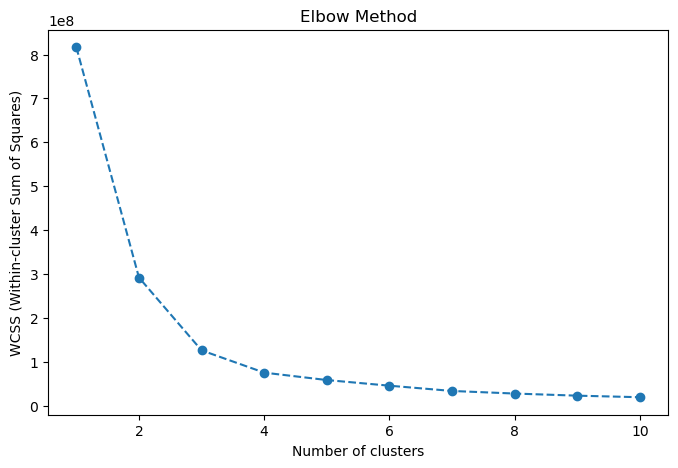

In [137]:
# Determine the optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

Cluster Statistics:
   Cluster        Age      Balance        Day    Duration  Campaign  Previous  \
0        0  39.995434   493.127854  14.885845  258.155251  2.511416  0.529680   
1        1  40.000000  4888.451613  16.548387  330.451613  2.000000  0.806452   

   Job_encoded  Marital_encoded  Education_encoded  Default_encoded  \
0     4.607306         1.136986           1.210046         0.022831   
1     4.258065         1.225806           1.193548         0.000000   

   Housing_encoded  Loan_encoded  Contact_encoded  Month_encoded  \
0         0.589041      0.182648         0.689498       5.488584   
1         0.548387      0.096774         0.548387       5.483871   

   PreviousOutcome_encoded  Y_encoded  
0                 2.602740   0.123288  
1                 2.322581   0.193548  


/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


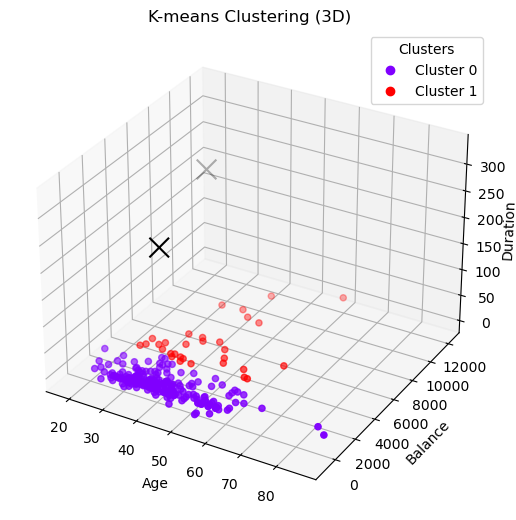

In [138]:
number_of_clusters = 2
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_

data['Cluster'] = cluster_labels

cluster_centers = kmeans.cluster_centers_

cluster_stats = data.groupby('Cluster').mean().reset_index()

print("Cluster Statistics:")
print(cluster_stats)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  

fig.subplots_adjust(left=0, right=1, bottom=0, top=1)


scatter = ax.scatter(X['Age'], X['Balance'], c=cluster_labels, cmap='rainbow')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='x', s=200, c='black')

ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_zlabel('Duration', labelpad=-1, y=1.0, rotation=0)

ax.set_title('K-means Clustering (3D)')

legend_labels = [f'Cluster {i}' for i in range(number_of_clusters)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.show()

In [139]:
from sklearn.metrics import silhouette_score

In [140]:
score = silhouette_score(X, cluster_labels)
print('Silhouette Score:', score)

Silhouette Score: 0.7495804216044283
